In [1]:
# get all packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import FuncFormatter
import warnings
import math as ma
warnings.filterwarnings("ignore")

## REDING EXCEL FILE

In [2]:
#kpmge=pd.ExcelFile('KPMG_VI_New_raw_data_update_final (3).xlsx')#i don't know why this line will be wrrritten
                                                                #without this its also work
df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic")
# path = "KPMG_VI_New_raw_data_update_final (3).xlsx" 
# df = pd.io.excel.read_excel(path,sheet_name="Transactions")
list(df)

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure']

In [3]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,67.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,40.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.0,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [4]:
temp=df['age'].dropna(axis=0)
df['age']=temp
df['age']=df['age'].fillna(0).astype('int64')

## Getting bikes baught by different genders

In [5]:
gender=[0,0,0]
for each in df['gender']:
    if each[0]=="F":
        gender[0]+=1
    elif each[0]=="M":
        gender[1]+=1
    else:
        gender[2]+=1
print(gender)

bikes=[0,0,0]
df[['past_3_years_bike_related_purchases']] = df[['past_3_years_bike_related_purchases']].apply(pd.to_numeric)
bikes[0] += df['past_3_years_bike_related_purchases'][df["gender"] == "Female"].sum()
bikes[1] += df['past_3_years_bike_related_purchases'][df["gender"] == "Male"].sum()
bikes[2] += df['past_3_years_bike_related_purchases'][df["gender"] == "U"].sum()
print(bikes)

[2039, 1873, 88]
[98359, 93483, 3718]


In [6]:
graphl=[gender[0]*10,bikes[0],gender[1]*10,bikes[1],gender[2]*10,bikes[2]]
print(graphl)
x=np.arange(6)
print(x)

[20390, 98359, 18730, 93483, 880, 3718]
[0 1 2 3 4 5]


## Plotting gender wise total bikes baught

[2039, 98359, 1873, 93483, 88, 3718]


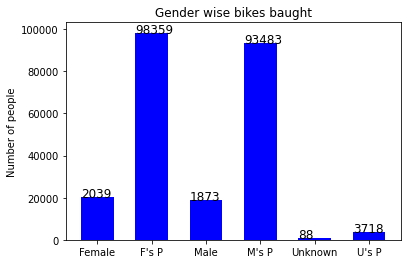

In [7]:
# fig, ax = plt.subplots()
plt.bar(x,graphl,color='blue',width=0.6)
plt.title("Gender wise bikes baught")
# ax.set_ylabel('Number of people')
plt.ylabel('Number of people')
plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))
graph_value=[gender[0],bikes[0],gender[1],bikes[1],gender[2],bikes[2]]
#Now the trick is here.
#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and graphl[index] will gives you y pos
# x=index-0.3 , y=graphl[index]+0.1 will provide a little gap in x axis and y-axis,
# str(value) will gives string value to put in y location
# otherwise it's create vary large size figure
for index,value in enumerate(graph_value):
    plt.text(x=index-0.3 , y=graphl[index]+0.1 , s=str(value), size=12)
print(graph_value)

## Plotting percentage of bikes baught by gender

[50.296, 47.803, 1.901]


Text(0.5, 0, 'gender')

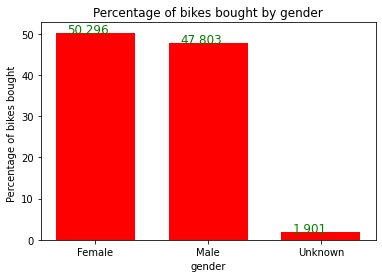

In [18]:
#plotting graph purchasing bikes percentage(Model Development)
avg=[0,0,0]
total=sum(bikes)
# print(total)
y=np.arange(3)
for i in  range(len(avg)):
    avg[i]=round((bikes[i]/total)*100,3)
print(avg)    
plt.bar(y,avg,color='red',width=0.7)
for i in range(len(avg)):
    plt.text(x=i-0.25,y=avg[i],s=avg[i],size=12,color='green')
plt.xticks(y,("Female","Male","Unknown"))
plt.ylabel("Percentage of bikes bought ")
plt.title("Percentage of bikes bought by gender")
plt.xlabel("gender")

## Plotting gender and age wise bikes baught

In [9]:
fq1=[]  # females between 32 years of age
mq1=[]  # males between 32 years of age
fq2=[]  # females between 32-49 years of age
mq2=[]  # males between 32-49 years of age
fq3=[]  # females between 49-66 years of age
mq3=[]  # males between 49-66 years of age
fq4=[]  # females over 66 years of age
mq4=[]  # males over 66 years of age
age1=[]
for i in range(len(df['age'])):
    if df['age'][i]!=0:
        age1.append(df['age'][i])
mean_age=round(np.mean(age1),0)  #mean age
age_stdv=round(np.std(age1),0) # standard deviation of age
fq=int(mean_age-age_stdv)   #32
sq=int(mean_age)            #49
tq=int(sq+age_stdv)         #66
j=0
for i in df['gender']:
    temp=int(df['age'][j])
    if df['gender'][j]=='Female' and temp!=0:
        if (temp<fq):
            fq1.append(temp)
        elif fq<temp and temp<=sq:
            fq2.append(temp)
        elif sq<temp and temp<=tq:
            fq3.append(temp)
        elif tq<temp:
            fq4.append(temp)
    elif df['gender'][j]=='Male' and temp!=0:
        if (temp<fq):
            mq1.append(temp)
        elif fq<temp and temp<=sq:
            mq2.append(temp)
        elif sq<temp and temp<=tq:
            mq3.append(temp)
        elif tq<temp:
            mq4.append(temp)
    j+=1

p_d={"Female1":fq1,
     "Female2":fq2,
     "Female3":fq3,
     "Female4":fq4,
     "Male1":mq1,
     "Male2":mq2,
     "Male3":mq3,
     "Male4":mq4,
    }

In [10]:
print(len(p_d["Female1"]),len(p_d["Female2"]),len(p_d["Female3"]),len(p_d["Female4"]))
print(len(p_d["Male1"]),len(p_d["Male2"]),len(p_d["Male3"]),len(p_d["Male4"]))

299 562 536 299
294 539 465 267


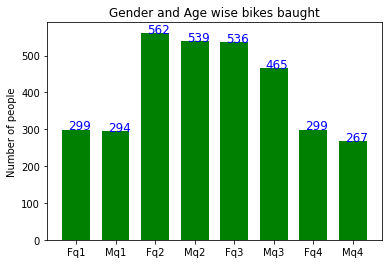

In [11]:
plot=[len(p_d["Female1"]),len(p_d["Male1"]),len(p_d["Female2"]),len(p_d['Male2']),len(p_d["Female3"]),len(p_d["Male3"]),len(p_d["Female4"]),len(p_d["Male4"])]
x1=np.arange(8)
plt.bar(x1,plot,color='green',width=0.7)
plt.xticks(x1,("Fq1","Mq1","Fq2","Mq2","Fq3","Mq3","Fq4","Mq4"))
plt.ylabel('Number of people')
plt.title('Gender and Age wise bikes baught')
for i in range(len(plot)):
    plt.text(x=i-0.2,y=plot[i],s=plot[i],size=12,color='blue')
plt.show()



## Analyzing customers on the basis of job industry category

In [12]:
df['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

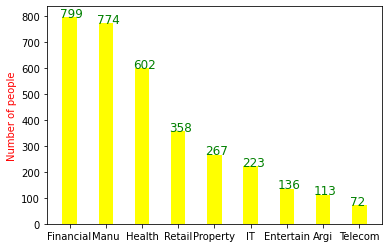

In [13]:
value=[799,774,602,358,267,223,136,113,72]
r=np.arange(9)
plt.bar(r,value,color='yellow',width=0.4)
plt.xticks(r,("Financial","Manu","Health","Retail","Property","IT","Entertain","Argi","Telecom"))
plt.ylabel('Number of people',color='red')
for i in range(len(value)):
    plt.text(x=i-0.25,y=value[i]+0.1,s=value[i],size=12,color='green')
plt.show()

## Wealth segment by age

In [14]:
df['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [15]:
#split into 3 parts: Mass,High,affluent
wsh  ={"q1":[],"q2":[],"q3":[],"q4":[]}   #q1=less than 32
wsm  ={"q1":[],"q2":[],"q3":[],"q4":[]}   #q2= more than 32 and less than 49
wsa  ={"q1":[],"q2":[],"q3":[],"q4":[]}   #q3= more than 49 and less than 66
val=0                                     #q4= more than 66
for each in df['wealth_segment']:
    temp = int(df['age'][val])
    if each[0]=='M' and temp!=0:
        if(temp<fq):
            wsm["q1"].append(temp)
        elif temp>fq and temp<=sq:
            wsm["q2"].append(temp)
        elif temp>sq and temp<=tq:
            wsm["q3"].append(temp)
        elif temp>tq:
            wsm["q4"].append(temp)
    elif each[0]=="H" and temp!=0:
        if(temp<fq):
            wsh["q1"].append(temp)
        elif temp>fq and temp<=sq:
            wsh["q2"].append(temp)
        elif temp>sq and temp<=tq:
            wsh["q3"].append(temp)
        elif temp>tq:
            wsh["q4"].append(temp)
    elif each[0]=="A" and temp!=0:
        if(temp<fq):
            wsa["q1"].append(temp)
        elif temp>fq and temp<=sq:
            wsa["q2"].append(temp)
        elif temp>sq and temp<=tq:
            wsa["q3"].append(temp)
        elif temp>tq:
            wsa["q4"].append(temp)
    val+=1
wshtp = [len(wsh["q1"]),len(wsh["q2"]),len(wsh["q3"]),len(wsh["q4"])]
wsmtp = [len(wsm["q1"]),len(wsm["q2"]),len(wsm["q3"]),len(wsm["q4"])]
wsatp = [len(wsa["q1"]),len(wsa["q2"]),len(wsa["q3"]),len(wsa["q4"])]

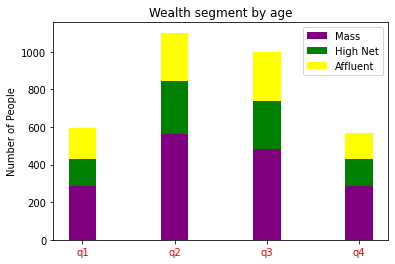

In [16]:
x2=np.arange(4)
bars = np.add(wsmtp,wshtp)
width = 0.3

plot1=plt.bar(x2,wsmtp,width,color='purple')
plot2=plt.bar(x2,wshtp,width,bottom=wsmtp,color='green')
plot3=plt.bar(x2,wsatp,width,bottom=bars,color='yellow')
plt.ylabel('Number of People')
plt.title('Wealth segment by age')
plt.xticks(x2,("q1","q2","q3","q4"),color='red')
plt.legend((plot1[0],plot2[0],plot3[0]),('Mass','High Net','Affluent'))
plt.show()

In [17]:
df['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64